In [103]:
# Here we using the libraries which are required to carry out different tasks

import seaborn as sns
from keras.utils.np_utils import to_categorical as zeroone
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import randint
from random import choice
from keras.layers import Conv2D, Dense, GlobalAveragePooling2D, Flatten
from keras import models
from random import uniform
from keras import layers
import tensorflow as tf

In [104]:
# Here we are loading mnist dataset from keras dataset
 
# It returns the values in pairs, so getting those as (X_train, y_train) as one pair and (X_test, y_test) as other pair
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [105]:
# Printing the shape of X_train & y_train
# This indicates we have 60000 images each with 28 rows & 28 columns
print(X_train.shape)

# This indicates we have 10000 images
y_train.shape

(60000, 28, 28)


(60000,)

In [106]:
# Printing the shape of X_test & y_test
# This indicates we have 10000 images each with 28 rows & 28 columns
print(X_test.shape)

# This indicates we have 10000 images
y_test.shape

(10000, 28, 28)


(10000,)

In [107]:
# Printing value of X_train
# Each 2D array contains 28*28 pixels of 1 image
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [108]:
# Printing value of y_train
# This basically contains the number of output classes we have
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

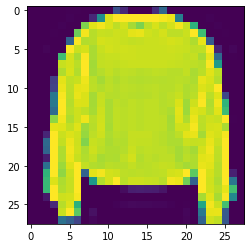

In [109]:
# Seeing what exactly present in that particular index of y_train, i.e, displaying the image itself
 
plt.imshow(X_train[7])

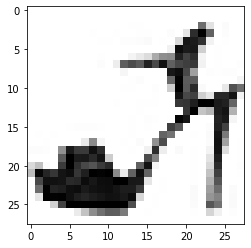

In [110]:
# Showing image in grey colour
plt.imshow(X_train[9], cmap='Greys')

In [111]:
# Changing our dataset from 3D to 4D, because CNN requires 4D data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [112]:
# Doing feature scaling here, so that values lies between 0 and 1 only
train_images =X_train.astype('float32')/255
test_images=X_test.astype('float32')/255

In [113]:
# Converting all y_train and y_test datas into a boolean matrix of 0's and 1's
print(y_train)
print(y_test)

train_labels=zeroone(y_train)
# Here no of rows = length of the input & no of cols = number of classes (here in our case 0-9)
test_labels=zeroone(y_test)
test_labels

[9 0 0 ... 3 0 5]
[9 2 1 ... 8 1 5]


array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [114]:
# Splitting data into training and validation part

validation_img=train_images[:10000]
img=train_images[10000:]

validation_lbl=train_labels[:10000]
lbl=train_labels[10000:]

In [116]:
# Here we make our model by randomly assigning values to various parameters

def making_model( normalcnnlayerfilter, reductioncnnlayer1filter, reductioncnnlayer2filter, normallayerkernel, reductionlayerkernel, nrmllyractfn, rdclyractfn, epochs):

    making_model=models.Sequential()    
    
    #Normal CNN Layer with Stride=1, Padding=SAME, 1<=kernel<8, and any of one activation function
    making_model.add(layers.Conv2D(filters=normalcnnlayerfilter, kernel_size=(2,2), activation=nrmllyractfn, strides=(1,1), padding='SAME', input_shape=[28,28,1]))
    
    #Reduction CNN Layer 1 with Stride=2, Padding=VALID, 1<=kernel<8, and any of one activation function
    making_model.add(layers.Conv2D(filters=reductioncnnlayer1filter, kernel_size=(2,2), activation=rdclyractfn, strides=(2,2), padding='valid'))
    
    #Reduction CNN Layer 2 with Stride=2, Padding=VALID, 1<=kernel<8, and any of one activation function
    making_model.add(layers.Conv2D(filters=reductioncnnlayer1filter, kernel_size=(2,2), activation=rdclyractfn, strides=(2,2), padding='valid'))
    
    #Final CNN layer with Globel Average Pooling
    making_model.add(GlobalAveragePooling2D())

    #Flatten our data
    making_model.add(layers.Flatten())

    # In order to avoid overfitting, using dropout
    #making_model.add(layers.Dropout(rate = frstdrpt))

    #Fully connected dense layer with 64 units & an activation function
    making_model.add(layers.Dense(units = 64, activation = "sigmoid"))

    
    # Output with 10 layers ranging from 0 to 9, each indicating the type of cloth
    making_model.add(layers.Dense(10, activation= "sigmoid"))

    # Compiling our cnn model which we make above with layers
    making_model.compile(optimizer='adam', loss= 'categorical_crossentropy', metrics=['accuracy']) # metrics to find accuracy
    
    #Fitting our model
    making_model.fit(img, lbl, validation_data=(validation_img,validation_lbl), epochs=epochs, batch_size = 100, verbose=1)

    
    #Returning our model 
    return making_model
 


In [117]:
# This code will take random values of the parameter which will get assign to our CNN model

def assign_random_values_to_parameters():
  
  # This indicates the number of paramater in our cnn model
  cnn_model_parameters = {}

  # This will choose normal CNN Layer Filters
  normalcnnlayerfilter = choice([32, 128, 8, 256,16, 64])
  cnn_model_parameters["normalcnnlayerfilter"] = normalcnnlayerfilter
  
  # This will choose Reduction CNN Layer 1 Filters
  get = choice([256, 128, 8, 32,16, 64])
  reductioncnnlayer1filter=get
  cnn_model_parameters["reductioncnnlayer1filter"] = reductioncnnlayer1filter
  
  # This will choose Reduction CNN Layer 2 Filters
  reductioncnnlayer2filter = get
  cnn_model_parameters["reductioncnnlayer2filter"] = reductioncnnlayer2filter
  
  # This will choose Normal CNN Layer Kernal matrix
  normallayerkernel = choice([1,2,3,4,5,6,7])
  cnn_model_parameters["normallayerkernel"] =normallayerkernel
  
  # This will choose Reduction CNN Layer Kernal matrix
  reductionlayerkernel = choice([1,2,3,4,5,6,7])
  cnn_model_parameters["reductionlayerkernel"] = reductionlayerkernel
  
  # This will choose Normal CNN Layer Activation Function
  nrmllyractfn = choice(["relu", "sigmoid", "tanh","swish","gelu"])
  cnn_model_parameters["nrmllyractfn"] = nrmllyractfn
  
  # This will choose Reduction CNN Layer Activation Function
  # For both of our Reduction CNN layers, the activation function, number of filters, kernel matrix size, all are same
  rdclyractfn = choice(["relu", "sigmoid", "tanh","swish","gelu"])
  cnn_model_parameters["rdclyractfn"] = rdclyractfn
  
  # Optimizer is same
  optmzr = "adam"
  cnn_model_parameters["optmzr"] = optmzr
  
  #epochs can be any integer between 10 and 30
  epochs = randint(10, 30)
  cnn_model_parameters["epochs"] = epochs
  
  return cnn_model_parameters

In [118]:
# Genetic Algorithm Step 1, making initial population so that we can able to start the reproduction phase

#Passed initial number of peoples in population
def making_initial_population(number_of_people_in_population):
  peoples_with_parameters = []
  for i in range(number_of_people_in_population):
    # For each person assigning it with random values of parameters
    cnn_model_parameters = assign_random_values_to_parameters()
    #Appending those values to peoples
    peoples_with_parameters.append(cnn_model_parameters)
  return peoples_with_parameters

In [119]:
# Step 2.1: Finding out the fitness values of each of the individual people in our population 
def compute_fitness(cnnmdl):
  # This will evaluate the accuracy of our model
  res = cnnmdl.evaluate(test_images, test_labels)
  
  #returning 1st index value of res, because it contains value of accuracy, and 0th index contains value of loss
  return res[1]

In [120]:
# Step 2.2: Selecting the best individual out of all the individuals from our population by using Roulette wheel selection method
def rltwhlslct(fitness_of_population):
  #Finding out the total fitness score of our whole population
  total = sum(fitness_of_population)
  
  #Finding out the weightage of fitness score of each of individual in our population
  weightage = [round((x/total) * 100) for x in fitness_of_population]
  
  #This is the wheel which we rotate, and then on the basis where the pointer points in the wheel, that individual will be choosen
  roulette_pointer_wheel = []

  #Here enumerting the weightage array, so that we get values in the form of key->value pairs with key starting from 0
  for sample_space_ind,value in enumerate(weightage):
    
    #Here we are appending the output in our roulette_pointer_wheel array
    roulette_pointer_wheel.extend([sample_space_ind]*value)

  #Sorting the weights
  roulette_pointer_wheel.sort()
  # Taking the maximum as our 1st parent
  parent1 = roulette_pointer_wheel[-1]
  # Taking the second maximum as our 2nd parent
  parent2 = roulette_pointer_wheel[-2]
  #Returning those 2 parents
  return [parent1, parent2]

In [121]:
#Step 3: Doing Cross-over of the 2 fittest individual from our model

# Here we passed both the parents along with there parameter values
def parent_cross_over(first_parent, second_parent):
  
  # From this function we expect 2 childrens to return
  first_child = {}
  # Making dictionary of both the children
  second_child = {}

  # First child's normalcnnlayerfilter can be any of 1st parent's or 2nd parent's normalcnnlayerfilter
  first_child["normalcnnlayerfilter"] = choice([first_parent["normalcnnlayerfilter"], second_parent["normalcnnlayerfilter"]])
  
  # First child's reductioncnnlayer1filter can be any of 1st parent's or 2nd parent's reductioncnnlayer1filter
  first_child["reductioncnnlayer1filter"] = choice([first_parent["reductioncnnlayer1filter"], second_parent["reductioncnnlayer1filter"]])
  
  # First child's reductioncnnlayer2filter can be any of 1st parent's or 2nd parent's reductioncnnlayer2filter
  first_child["reductioncnnlayer2filter"] = choice([first_parent["reductioncnnlayer2filter"], second_parent["reductioncnnlayer2filter"]])

  # Second child's reductioncnnlayer1filter can be any of 1st parent's or 2nd parent's reductioncnnlayer1filter
  second_child["normalcnnlayerfilter"] = choice([first_parent["normalcnnlayerfilter"], second_parent["normalcnnlayerfilter"]])
  
  # Second child's reductioncnnlayer2filter can be any of 1st parent's or 2nd parent's reductioncnnlayer2filter
  second_child["reductioncnnlayer1filter"] = choice([first_parent["reductioncnnlayer1filter"], second_parent["reductioncnnlayer1filter"]])
  second_child["reductioncnnlayer2filter"] = choice([first_parent["reductioncnnlayer2filter"], second_parent["reductioncnnlayer2filter"]])

  # First child's normalkernellayer can be any of 1st parent's or 2nd parent's normalkernellayer
  first_child["normallayerkernel"] = choice([first_parent["normallayerkernel"], second_parent["normallayerkernel"]])
  
  # Second child's normalkernellayer can be any of 1st parent's or 2nd parent's normalkernellayer
  second_child["normallayerkernel"] = choice([first_parent["normallayerkernel"], second_parent["normallayerkernel"]])
  
  # First child's reductionkernellayer can be any of 1st parent's or 2nd parent's reductionkernellayer
  first_child["reductionlayerkernel"] = choice([first_parent["reductionlayerkernel"], second_parent["reductionlayerkernel"]])
  
  # Second child's reductionkernellayer can be any of 1st parent's or 2nd parent's reductionkernellayer
  second_child["reductionlayerkernel"] = choice([first_parent["reductionlayerkernel"], second_parent["reductionlayerkernel"]])

  # Here Doing the Crossover of parent features in child, so as to get best results
  # First child's normal activation function is 1st parent's reduction activation function
  first_child["nrmllyractfn"] = first_parent["rdclyractfn"]
  
  # Second child's normal activation function is 2nd parent's reduction activation function
  second_child["nrmllyractfn"] = second_parent["rdclyractfn"]

  # First child's reduction activation function is 1st parent's normal activation function
  first_child["rdclyractfn"] = second_parent["nrmllyractfn"]
  
  # Second child's reduction activation function is 1st parent's normal activation function
  second_child["rdclyractfn"] = first_parent["nrmllyractfn"]

  # Again cross-oover here so to get diverse characteristics
  # First child's optimizer is 2nd parent's optimizer
  first_child["optmzr"] = second_parent["optmzr"]

  # Second child's optimizer is 1st parent's optimizer
  second_child["optmzr"] = first_parent["optmzr"]

  # First child's epochs is 1st parent's epochs
  first_child["epochs"] = first_parent["epochs"]

  # Second child's epochs is 2nd parent's epochs
  second_child["epochs"] = second_parent["epochs"]
  
  # Returing both the offsprings which we get here by doing cross-over of the 2 parents above
  return [first_child, second_child]

In [122]:
# Step 4: In this we mutating the child so as to get the diverse characteristics in the child
def child_mutn(individual):
  answr = randint(0,50)
  if answr <= 30:
    # Randomly inreasing the number of epochs so as to make it more
    individual["epochs"] += randint(0, 20)
  return individual

In [ ]:
#Making our model to run for the given number of generations & giving the size of initial population

# Indicates the total number of generations
number_of_generations = 3

#Indicates the number of peoples in our population
number_of_people_in_population = 4

# Making a dictionary which contains key->value pairs which contains key as the accuracy & value as the paramters of our cnn model which gets that accuracy
track_of_param_and_accuracy={}

# This indicates the maximum accuracy value along with its parameters
highest_acc_with_param=0

#Making our population with the given number of individuals and here we get all peoples with parameters
peoples = making_initial_population(number_of_people_in_population)

# Here we are iterating each of generation so as to get result in each generation
for each_gen in range(number_of_generations):
  print("Currently Runnung Generation is:",each_gen+1)

  # This contains the list of all the accuracies we got
  list_of_accuracies = []
  # Iterating for each of our individual person in the population
  for individual in peoples:
    #Taking values of each parameter from the peoples array
    
    # Taking value of normal filter
    normalcnnlayerfilter = individual["normalcnnlayerfilter"]
    
    # Taking value of reduction layer 1 filter
    reductioncnnlayer1filter = individual["reductioncnnlayer1filter"]
    
    # Taking value of reduction layer 2 filter
    reductioncnnlayer2filter = individual["reductioncnnlayer2filter"]
    
    # Taking value of normal layer kernel
    normallayerkernel = individual["normallayerkernel"]
    
     # Taking value of reduction layer kernel
    reductionlayerkernel = individual["reductionlayerkernel"]
    
     # Taking value of normal activation function
    nrmllyractfn = individual["nrmllyractfn"]
    
    # Taking value of redcution activation function
    rdclyractfn = individual["rdclyractfn"]
    #frstdrpt = individual["frstdrpt"]
    #scnddrpt = individual["scnddrpt"]
    
    # Taking value of optimizer
    optmzr = individual["optmzr"]

    # Taking value of epochs
    epochs = individual["epochs"]
    
    #With those values making our model
    cnn_model_making = making_model(normalcnnlayerfilter, reductioncnnlayer1filter, reductioncnnlayer2filter, normallayerkernel, reductionlayerkernel, nrmllyractfn, rdclyractfn, epochs)
    # Finding out the fitness of our model
    gotten_accuracy = compute_fitness(cnn_model_making)
    print("The parameters of CNN Model are: ", individual)
    print("The accuracy of CNN Model is: ", round(gotten_accuracy,3))

    # This will contain like key->value pair, which tells the accuracy and its corresponding parameters
    track_of_param_and_accuracy[gotten_accuracy]= individual
    
    #This will pull out that one who has maximum accuracy
    highest_acc_with_param=max(track_of_param_and_accuracy)
    
    #Appending that accuracy in our list
    list_of_accuracies.append(gotten_accuracy)

  #Sending the list of all accuracies in roulette_pointer_wheel function & returning the fittest 2 parents
  two_fittest_persons = rltwhlslct(list_of_accuracies)
  parent1 = peoples[two_fittest_persons[0]]
  parent2 = peoples[two_fittest_persons[1]]

  # Sending those 2 parents with parameters to cross-over function so as to produce an offspring
  childs = parent_cross_over(parent1, parent2)
  
  #Doing the mutation of each of the child, so as to get the diverse characteristics in the child
  child1 = child_mutn(childs[0])
  child2 = child_mutn(childs[1])

  #Now appending those childs in our population, as they will lead the new generation
  peoples.append(child1)
  peoples.append(child2)

  #Removing those who have least 2 accuracies
  #Getting the 1st least one
  least1 = min(list_of_accuracies)
  #Getting index of 1st least
  least1_index = list_of_accuracies.index(least1)
  #Removing the 1st least
  peoples.remove(peoples[least1_index])
  #Getting the 2nd least one
  least2 = min(list_of_accuracies)
  #Getting index of 2nd least
  least2_index = list_of_accuracies.index(least2)
  #Removing the 2nd least
  peoples.remove(peoples[least2_index])

#print(track_of_param_and_accuracy.get(max_key))

Currently Runnung Generation is: 1
Epoch 1/22
500/500 [==============================] - 9s 16ms/step - loss: 1.8121 - accuracy: 0.3308 - val_loss: 1.2659 - val_accuracy: 0.5491
Epoch 2/22
500/500 [==============================] - 8s 15ms/step - loss: 1.0853 - accuracy: 0.6190 - val_loss: 0.9467 - val_accuracy: 0.6644
Epoch 3/22
500/500 [==============================] - 8s 16ms/step - loss: 0.9052 - accuracy: 0.6743 - val_loss: 0.8457 - val_accuracy: 0.6961
Epoch 4/22
500/500 [==============================] - 8s 15ms/step - loss: 0.8257 - accuracy: 0.6998 - val_loss: 0.7973 - val_accuracy: 0.7064
Epoch 5/22
500/500 [==============================] - 8s 15ms/step - loss: 0.7681 - accuracy: 0.7197 - val_loss: 0.7461 - val_accuracy: 0.7314
Epoch 6/22
500/500 [==============================] - 8s 16ms/step - loss: 0.7273 - accuracy: 0.7367 - val_loss: 0.7209 - val_accuracy: 0.7327
Epoch 7/22
500/500 [==============================] - 8s 16ms/step - loss: 0.6947 - accuracy: 0.7483 - val_

In [ ]:
arr=[]
for value in track_of_param_and_accuracy.get(highest_acc_with_param).values():
    arr.append(value)

print("NC",arr[0],arr[3],arr[5]+";"+"RC",arr[1],arr[4],arr[6]+";"+"RC",arr[1],arr[4],arr[6]+";"+"FL","sigmoid"+";")